# Simple Model

## Import Libraries



In [ ]:
import struct
import numpy as np
from keras.layers import Conv2D,Conv1D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
from tensorflow.keras.utils import to_categorical
import tensorflow

In [ ]:
### CNN models ###
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.utils import np_utils
from keras.regularizers import l2#, activity_l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from keras import models
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load yolov3 model and perform object detection
# we will use a pre-trained model to perform object detection on an unseen photograph
from numpy import expand_dims, asarray
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import cv2
import numpy as np
from tensorflow.keras import backend as K

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
from scipy.ndimage import zoom
from skimage.feature import hog
import dlib
import scipy
import matplotlib.pyplot as plt

## Data Preparation

In [ ]:
def get_label(argument):
    labels = {0:'Neutral', 1:'Happy', 2:'Sad', 3:'Surprise', 4:'Fear' , 5:'Disgust', 6:'Anger', 7:'Contempt'}
    return(labels.get(argument, "Invalid emotion"))

In [ ]:
OUTPUT_FOLDER_NAME='/content/drive/MyDrive/FYP/outputs/'
X_hog_img = np.load(OUTPUT_FOLDER_NAME + "train_hog_slide_images.npy").reshape(-1, 48, 48, 1)
X_imgs = np.load(OUTPUT_FOLDER_NAME + "train_images.npy")
y_new = np.load(OUTPUT_FOLDER_NAME + "train_labels.npy")
y_hot = np.load(OUTPUT_FOLDER_NAME + "train_labels_one_hot.npy")
X_new = np.load(OUTPUT_FOLDER_NAME + "train_image_features.npy")
X_hog_feat = np.load(OUTPUT_FOLDER_NAME + "train_hog_slide_features.npy").reshape(-1,2592,1)

X_val_hog_img = np.load(OUTPUT_FOLDER_NAME + "val_hog_slide_images.npy").reshape(-1, 48, 48, 1)
X_val_imgs = np.load(OUTPUT_FOLDER_NAME + "val_images.npy")
y_val_new = np.load(OUTPUT_FOLDER_NAME + "val_labels.npy")
y_val_hot = np.load(OUTPUT_FOLDER_NAME + "val_labels_one_hot.npy")
X_val_new = np.load(OUTPUT_FOLDER_NAME + "val_image_features.npy")
X_val_hog_feat = np.load(OUTPUT_FOLDER_NAME + "val_hog_slide_features.npy").reshape(-1,2592,1)

X_imgs = np.load(OUTPUT_FOLDER_NAME + "images_1.npy")
y_new = np.load(OUTPUT_FOLDER_NAME + "labels_1.npy")
y_hot = np.load(OUTPUT_FOLDER_NAME + "labels_one_hot_1.npy")
X_new = np.load(OUTPUT_FOLDER_NAME + "image_features_1.npy")

Text(0.5, 1.0, 'Ground Truth : Happy')

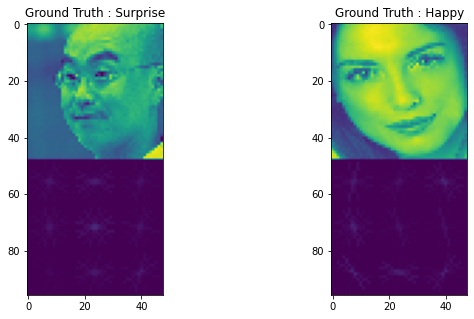

In [ ]:
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(np.reshape(X_val_new[50],(96,48)))
plt.title("Ground Truth : {}".format(get_label(int(y_val_new[50]))))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(np.reshape(X_new[348],(96,48)))
plt.title("Ground Truth : {}".format(get_label(int(y_new[348]))))

## Sampling

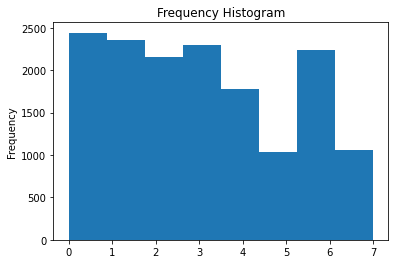

In [ ]:
plt.hist(y_hot.argmax(1), bins=8)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_train = X_new.reshape(X_new.shape[0],96*48)
samp = SMOTE(random_state = 50,sampling_strategy='not majority',k_neighbors=5)
X_train,y_train = samp.fit_resample(X_train,y_new)
print(X_train.shape)
print(y_train.shape)
print(X_train.shape[0])
X_train = X_train.reshape(X_train.shape[0],96,48,1)


(34688, 4608)
(34688,)
34688


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train = X_new
y_train = to_categorical(y_new)
# X_train,X_1,y_train,y_1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_val_new, y_val_hot, test_size=0.3, random_state=42)

In [ ]:
X_val.shape

(1200, 96, 48, 1)

## Simple model

In [ ]:
def createModel():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(128))
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(Activation('softmax'))

    return model

In [ ]:
model = createModel()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 32
epochs = 100

datagen = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False) 

checkpoint = ModelCheckpoint('/content/drive/MyDrive/FYP/Models/simple_image_final.h5',verbose=1,monitor='val_accuracy',save_best_only=True,mode='max')

# history = model.fit(X_train, y_train, batch_size=batch_size,
#     epochs = epochs, verbose=1, validation_split=0.1, shuffle=True,
history=model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
    epochs = epochs, 
    validation_data=(X_1, y_1),
    callbacks=[checkpoint])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


487/489 [============================>.] - ETA: 0s - loss: 2.0410 - accuracy: 0.1912
Epoch 1: val_accuracy improved from -inf to 0.13415, saving model to /content/drive/MyDrive/FYP/Models/simple_image_final.h5
489/489 [==============================] - 12s 21ms/step - loss: 2.0409 - accuracy: 0.1911 - val_loss: 3.5038 - val_accuracy: 0.1342
Epoch 2/100
487/489 [============================>.] - ETA: 0s - loss: 1.9325 - accuracy: 0.2419
Epoch 2: val_accuracy improved from 0.13415 to 0.28085, saving model to /content/drive/MyDrive/FYP/Models/simple_image_final.h5
489/489 [==============================] - 10s 20ms/step - loss: 1.9320 - accuracy: 0.2424 - val_loss: 1.8601 - val_accuracy: 0.2808
Epoch 3/100
489/489 [==============================] - ETA: 0s - loss: 1.8416 - accuracy: 0.2855
Epoch 3: val_accuracy did not improve from 0.28085
489/489 [==============================] - 10s 20ms/step - loss: 1.8416 - accuracy: 0.2855 - val_loss: 1.9291 - val_accuracy: 0.2629
Epoch 4/100
489/48

## Hybrid Model

In [ ]:
def createEdgeModel():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Flatten())

    # model.add(Dense(512))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))
    # model.add(Dropout(0.25))

    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(128))
    model.add(Activation('relu'))

    # model.add(Dense(8))
    # model.add(Activation('softmax'))

    return model

In [ ]:
def createHogModel():
    model = Sequential()

    model.add(Conv1D(1024, 3, padding='same', input_shape=(2592,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(128))
    model.add(Activation('relu'))

    return model

In [ ]:
edge_model = createEdgeModel()
hog_model = createHogModel()
model_concat = concatenate([edge_model.output,hog_model.output],axis=1)
model_concat = Dense(8,activation='softmax',activity_regularizer=l2(0.001))(model_concat)
hybrid = Model(inputs=[edge_model.input, hog_model.input], outputs=model_concat)

In [ ]:
datagen = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False)     # randomly flip images

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_hog_train.shape

((10404, 48, 48, 1),
 (1836, 48, 48, 1),
 (10404, 1),
 (1836, 1),
 (10404, 2592, 1))

In [ ]:
hybrid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
epochs = 30

# early = EarlyStopping(monitor='val_accuracy',patience=5)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/FYP/Models/hybrid_cnn_model_best.h5',verbose=1,monitor='val_accuracy',save_best_only=True,mode='max')
# Fit the model on the batches generated by datagen.flow().
history = hybrid.fit([X_train,X_hog_train], y_train, batch_size=batch_size,
    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
    epochs = epochs, verbose=1, validation_split=0.1, shuffle=True,
    callbacks=[checkpoint]
)

## Xception

In [ ]:
def entry_flow(inputs) :
    
    x = Conv2D(32, 3, strides = 2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64,3,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    previous_block_activation = x
    
    for size in [64, 128, 256] :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = MaxPooling2D(3, strides=2, padding='same')(x)
        
        residual = Conv2D(size, 1, strides=2, padding='same')(previous_block_activation)
        
        x = tensorflow.keras.layers.Add()([x, residual])
        previous_block_activation = x
    
    return x

In [ ]:
def middle_flow(x, num_blocks=8) :
    
    previous_block_activation = x
    
    for _ in range(num_blocks) :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = tensorflow.keras.layers.Add()([x, previous_block_activation])
        previous_block_activation = x
    
    return x

In [ ]:
def exit_flow(x) :
   
    previous_block_activation = x
    
    x = Activation('relu')(x)
    x = SeparableConv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    
    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = tensorflow.keras.layers.Add()([x, residual])
      
    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = GlobalAveragePooling2D()(x)

    x = Dense(8, activation='softmax', activity_regularizer=l2(0.001))(x)
    
    return x

In [ ]:
inputs = Input(shape=(96, 48, 1))
outputs = exit_flow(middle_flow(entry_flow(inputs)))
xception = Model(inputs, outputs)

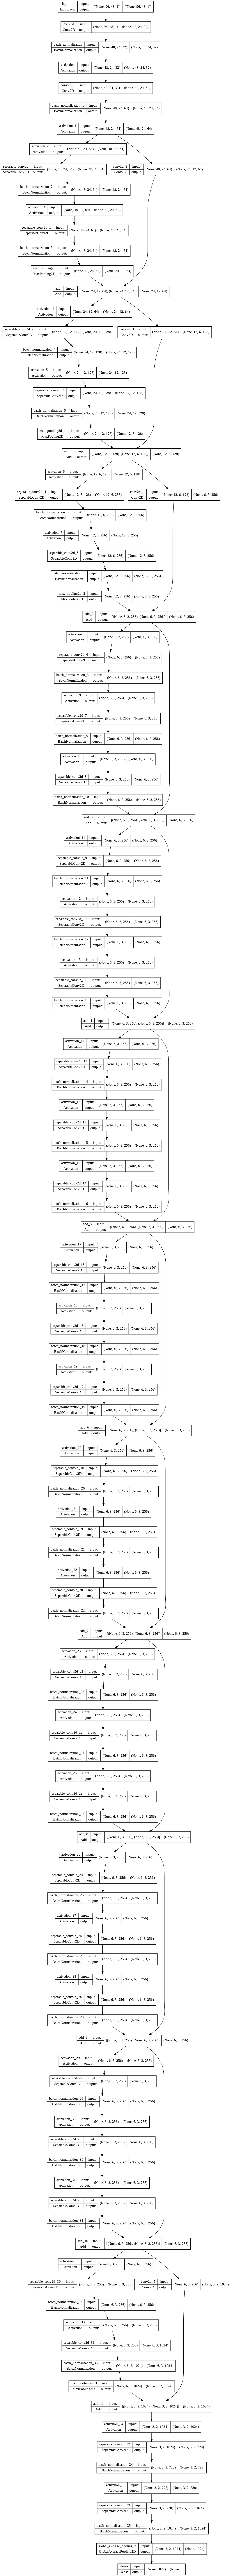

In [ ]:
plot_model(xception, to_file='model_plot_4.png',show_shapes=True, show_layer_names=True)

In [ ]:
xception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 48, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 24, 32)   320         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 48, 24, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 48, 24, 32)   0           ['batch_normalization[0][0]']

In [ ]:
xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint("/content/drive/MyDrive/FYP/Models/Try/xception_img_bal.h5",monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
batch_size = 128
epochs = 150

In [ ]:
datagen = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False)     # randomly flip images

In [ ]:
# history = xception.fit(X_train, y_train, batch_size=batch_size,
#     steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
#     epochs = epochs,  verbose=1, validation_split=0.1, shuffle=True,
#     callbacks = [checkpoint]
# )
history = xception.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
    epochs = epochs, 
    validation_data=(X_val, y_val),
    callbacks = [checkpoint]
)
